In [12]:
import sys
import os.path
import pylab as plt
path = '../'
sys.path.append(path)
from istat import istat
import pandas as pd

In [13]:
df=pd.read_csv('./roc.csv')
df=df.sort_values('fpr')
#df=df.drop('threshold',axis=1)

In [14]:
IST=istat(df=df,order=3,total_samples=100000,positive_samples=1000,alpha=0.1,prevalence=.01)

In [15]:
IST.smooth(STEP=0.001)
IST.convexify()
IST.allmeasures(interpolate=True)
IST.correctPPV()
IST.usample(precision=3)
IST.cb_delta()
IST.getUL(direction='L')
IST.getUL(direction='U')
print(IST.auc())


{'L': 0.8531552715556388, 'U': 0.883767311509942, 'nominal': 0.8685086599817684}


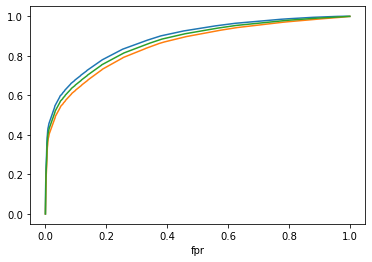

In [16]:
ax=IST.df_lim['U'].tpr.plot()
ax=IST.df_lim['L'].tpr.plot(ax=ax)
ax=IST.get().tpr.plot(ax=ax)


In [17]:
wf=IST.get()

<AxesSubplot:xlabel='LR-'>

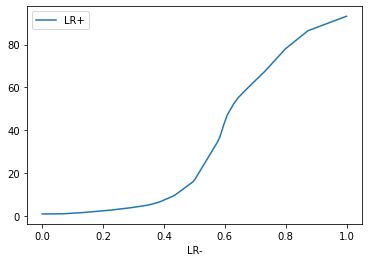

In [18]:
wf.plot(x='LR-',y='LR+')

In [19]:
IST.operating_zone(LRminus=.65)

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.006,0.360985,0.357206,0.987062,0.993544,55.121401,0.643252,0.134702
high sensitivity,0.058,0.586942,0.092155,0.937978,0.995588,10.050344,0.438703,0.016043


In [20]:
IST.auc_cb2()

In [21]:
IST.auc()

{'L': 0.8531552715556388,
 'U': 0.883767311509942,
 'nominal': 0.8685086599817684,
 'auc_L': 0.8519208429937031,
 'auc_U': 0.8870851289710118}

In [22]:
IST.interpret(fpr=0.006,number_of_positives=100)

,pos,flags,tp,fp,fn
numbers,100,247,46,201,54
